In [7]:
'''
GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 
클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성
하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 
속성에 저장된다.
'''

import numpy as np
import pandas as pd
# 추세 그래프 및 통계용 차트를 제공하는  시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt
# os : 환경설정 패키지
import os
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pylab as plt
import matplotlib as mpl

# sklearn.tree 의 DecisonTreeClassifier:분류 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
# graphviz import: 의사결정 나무 모델 시각화 .dot 확장자 파일 불러오는 패키지
import graphviz



In [8]:
ds_health = pd.read_csv("../../실습화일/유방암.csv",engine ="python",encoding = 'euc-kr')
ds_health.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
## 1. 데이터 구성하기 - 데이터 분할 1: numpy의 random 함수 이용 (train:test = 7:3)
np.random.seed(seed = 1234)
# 0.7보다 작으면 True => train data, else test data
msk = np.random.rand(ds_health.shape[0])<0.7
ds_health_train = ds_health[msk]
ds_health_test = ds_health[~msk]
# train/test 데이터의 목표변수 설명변수 지정
ds_health_train_y = ds_health_train["diagnosis"]
ds_health_train_x = ds_health_train.drop("diagnosis",axis = 1, inplace = False)
ds_health_test_y = ds_health_test["diagnosis"]
ds_health_test_x = ds_health_test.drop("diagnosis",axis = 1, inplace = False)
# train data 와 test data의 크기 
print("train data X size : {}".format(ds_health_train_x.shape))
print("train data Y size : {}".format(ds_health_train_y.shape))
print("test data X size : {}".format(ds_health_test_x.shape))
print("test data Y size : {}".format(ds_health_test_y.shape))


train data X size : (385, 30)
train data Y size : (385,)
test data X size : (184, 30)
test data Y size : (184,)


In [10]:
## 1. 데이터 구성하기 - 데이터 분할 1: sklearn의 train_test_split 함수 이용 (train:test = 7:3)
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth': np.arange(3, 10)}

crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)

    tree.fit(ds_health_train_x, ds_health_train_y)
    tree_preds = tree.predict_proba(ds_health_test_x)[:, 1]
    tree_performance = roc_auc_score(ds_health_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))
    


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.946875
DecisionTree: Area under the ROC curve = 0.9748046875


In [14]:
#데이터구성하기
np.random.seed(seed=1234)
ds_health_dummy = pd.get_dummies(ds_health)
msk = np.random.rand(ds_health_dummy.shape[0])<0.7
ds_health_train = ds_health_dummy[msk]
ds_health_test = ds_health_dummy[~msk]
#train/test 데이터의 목표변수 설명변ㅅ 지정
ds_health_train_y = ds_health_train["diagnosis"]
ds_health_train_x = ds_health_train.drop("diagnosis", axis=1, inplace=False)
ds_health_test_y = ds_health_test["diagnosis"]
ds_health_test_x = ds_health_test.drop("diagnosis", axis = 1, inplace = False)

print("train data X size : {}".format(ds_health_train_x.shape))
print("train data Y size : {}".format(ds_health_train_y.shape))
print("test data X size : {}".format(ds_health_test_x.shape))
print("test data Y size : {}".format(ds_health_test_y.shape))


train data X size : (385, 30)
train data Y size : (385,)
test data X size : (184, 30)
test data Y size : (184,)


In [15]:
#의사결정나무모델 파라미터 조정
#train 및 test정확도 결과 저장용
train_accuracy= []
test_accuracy = []
#적용가능한 criterion: gini, entropy
para_criterion = ["gini", "entropy"]
#para_criterion 별로 트리 모델 생성 및 정확도값 저장
for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion = criterion, random_state = 1234)
    tree1.fit(ds_health_train_x, ds_health_train_y)
    train_accuracy.append(tree1.score(ds_health_train_x, ds_health_train_y))
    test_accuracy.append(tree1.score(ds_health_test_x, ds_health_test_y))

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)
    

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.935
1,entropy,1.0,0.967


In [16]:
## 2. 의사결정나무 모델 생성 - 기본 옵션으로 트리 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(ds_health_train_x,ds_health_train_y)
# 훈련 데이터 정확도 
print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(ds_health_train_x,ds_health_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(ds_health_test_x,ds_health_test_y)))


Accuracy on training set : 1.000
Accuracy on test set : 0.935


<class 'sklearn.tree.tree.DecisionTreeClassifier'>


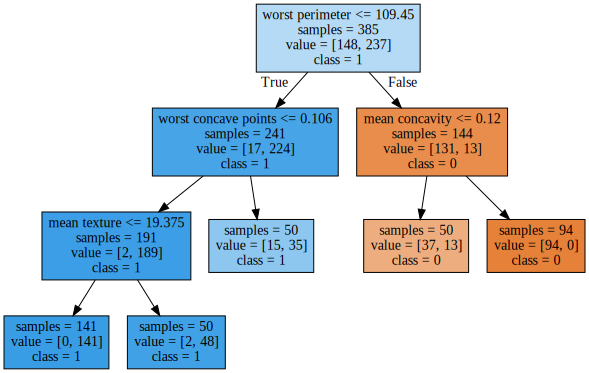

In [17]:
## 3. 의사결정나무 모델 시각화  - graphviz 패키지로 트리 모델 시각화
# 트리 모델 생성 gini,depth = 4로 모델 생성
tree4 = DecisionTreeClassifier(criterion = "gini",max_depth =4 ,min_samples_leaf = 50, random_state = 1234)
print(type(tree4))
# 트리모델 training
tree5 = tree4.fit(ds_health_train_x,ds_health_train_y)

# 트리 모델을 tree.dot 파일로 저장
export_graphviz(tree5,out_file = "tree2.dot",class_names=["0","1"],
               feature_names = ds_health_train_x.columns,impurity=False,filled = True)

#PATH 설정 :
# os.environ["PATH"] += os.pathsep + "./"

# Graphviz로 트리 모델 시각화s
with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
# 설명변수 중요도 그래프 함수 정의 
def plot_feature_importances(model):
    n_features = ds_health_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align ="center")
    plt.yticks(np.arange(n_features),ds_health_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
#설명변수 중요도 그래프 함수 실행
    
plot_feature_importances(visual_tree)

NameError: name 'visual_tree' is not defined

In [19]:
# 의사결정나무 모델  parameter 조절 , max_depth (최대 깊이 변경)
# train 및 test 정확도 결과 저장용
## 2. 의사결정나무 모델 Parameter 조정 - Criterion : 분리 기준 변경(gini,entropy)
# train 및 test 정확도 결과 저장용 
train_accuracy = []
test_accuracy = []
#parameter 결과테이블
para_criterion=[];para_max_depth=[]
n_iter_depth = 10
# 적용가능한 criterion: gini,entropy
list_criterion = ["gini","entropy"]
# criterion : gini, entropy & max_depth : 1~10 반복실행
for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion = criterion,max_depth =depth, random_state =1234)
        tree2.fit(ds_health_train_x,ds_health_train_y)
        
        
        train_accuracy.append(tree2.score(ds_health_train_x,ds_health_train_y))
        test_accuracy.append(tree2.score(ds_health_test_x,ds_health_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)


In [20]:
# max_depth : 최대 깊이 변경에 따른 정확도 변화
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"]=para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.922,0.908
1,gini,2,0.943,0.940
2,gini,3,0.971,0.924
3,gini,4,0.992,0.946
4,gini,5,0.995,0.935
5,gini,6,0.997,0.935
6,gini,7,1.000,0.935
7,gini,8,1.000,0.935
8,gini,9,1.000,0.935
9,gini,10,1.000,0.935


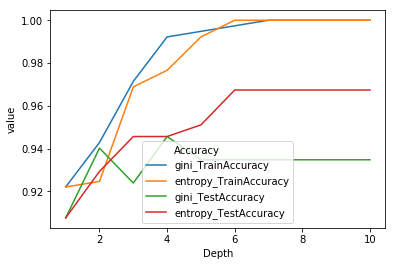

In [21]:
## 2. 의사결정나무 모델 Parameter 조정 - max_depth 최대 깊이 변경에 따른 정확도 변경
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars = ["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"]+"_"+ds_accuracy2_melt["variable"]
sns.lineplot(x = "Depth",y = "value",hue = "Accuracy",data = ds_accuracy2_melt)

In [22]:
# 의사결정나무 모델  parameter 조절 , max_sample_size (잎사귀 수 제한)
# train 및 test 정확도 결과 저장용
## 2. 의사결정나무 모델 Parameter 조정 - Criterion : 분리 기준 변경(gini,entropy)
# train 및 test 정확도 결과 저장용 
train_accuracy = []
test_accuracy = []
#parameter 결과테이블
para_criterion=[];para_max_depth=[];para_min_leaf_size = []
max_depth = 10
list_min_leaf_size = [i*10 for i in range(1,6)]
# 적용가능한 criterion: gini,entropy
# list_criterion = ["gini","entropy"]
# criterion : gini, entropy & max_depth : 1~10 반복실행
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion = criterion,max_depth =depth,min_samples_leaf= leafsize, random_state =1234)
        tree3.fit(ds_health_train_x,ds_health_train_y)
        
        
        train_accuracy.append(tree3.score(ds_health_train_x,ds_health_train_y))
        test_accuracy.append(tree3.score(ds_health_test_x,ds_health_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [23]:
# 의사결정나무 모델  parameter 조절 , max_sample_size (잎사귀 수 제한)
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"]=para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.943,0.946
1,gini,10,20,0.925,0.929
2,gini,10,30,0.922,0.908
3,gini,10,40,0.922,0.908
4,gini,10,50,0.922,0.908
5,entropy,10,10,0.969,0.940
6,entropy,10,20,0.925,0.929
7,entropy,10,30,0.922,0.908
8,entropy,10,40,0.922,0.908
9,entropy,10,50,0.922,0.908


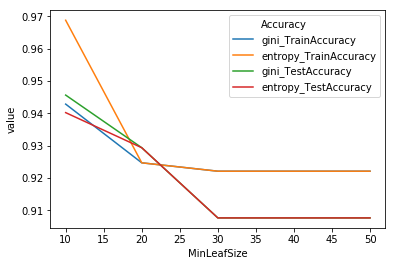

In [24]:
# 정확도를 그래프로 표현
## 2. 의사결정나무 모델 Parameter 조정 - max_sample_size (잎사귀 수 제한)
ds_accuracy3_melt = pd.melt(ds_accuracy3,id_vars = ["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x = "MinLeafSize",y = "value",hue = "Accuracy",data = ds_accuracy3_melt)

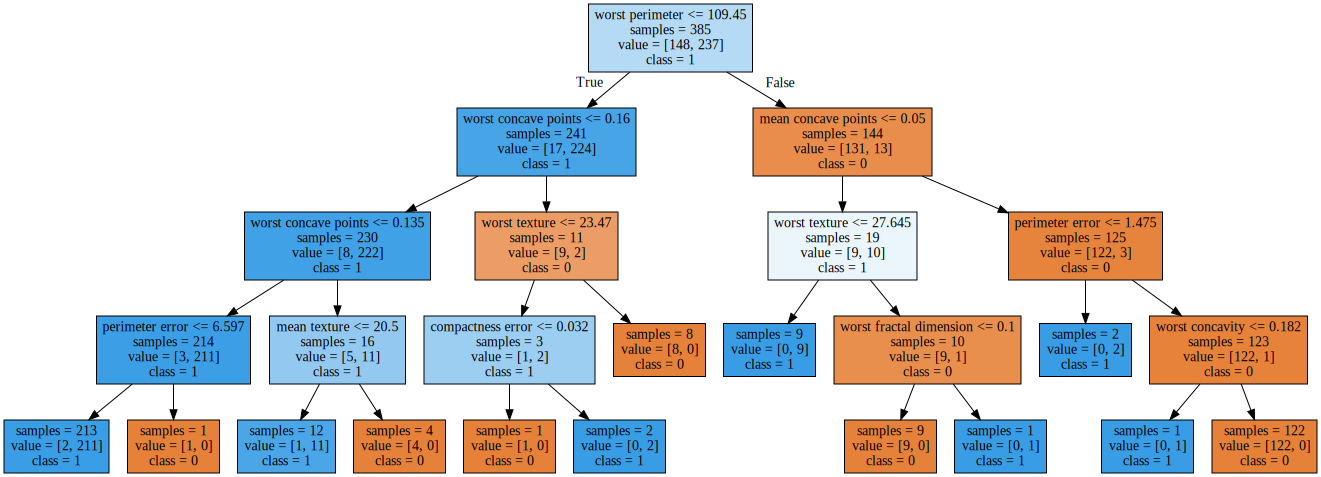

In [25]:
## 3. 의사결정나무 모델 시각화  - graphviz 패키지로 트리 모델 시각화
# 트리 모델 생성 gini,depth = 4로 모델 생성
tree = DecisionTreeClassifier(criterion = "gini",max_depth =4 , random_state = 1234)
# 트리모델 training
tree.fit(ds_health_train_x,ds_health_train_y)

# 트리 모델을 tree.dot 파일로 저장
export_graphviz(tree,out_file = "tree.dot",class_names=["0","1"],
               feature_names = ds_health_train_x.columns,impurity=False,filled = True)

#PATH 설정 :
# os.environ["PATH"] += os.pathsep + "./"

# Graphviz로 트리 모델 시각화s
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

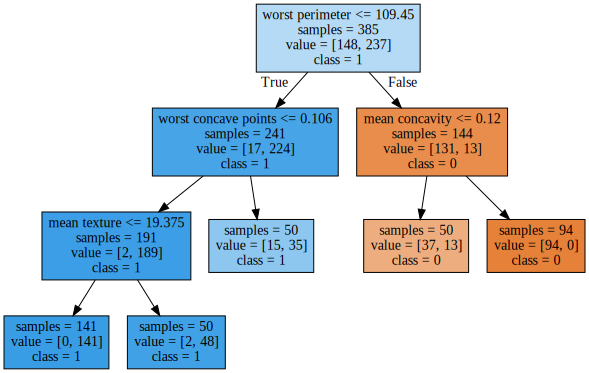

In [26]:
## 3. 의사결정나무 모델 시각화  - graphviz 패키지로 트리 모델 시각화
# 트리 모델 생성 gini,depth = 4로 모델 생성
tree4 = DecisionTreeClassifier(criterion = "gini",max_depth =4 ,min_samples_leaf = 50, random_state = 1234)
# 트리모델 training
tree5 = tree4.fit(ds_health_train_x,ds_health_train_y)

# 트리 모델을 tree.dot 파일로 저장
export_graphviz(tree5,out_file = "tree2.dot",class_names=["0","1"],
               feature_names = ds_health_train_x.columns,impurity=False,filled = True)

#PATH 설정 :
# os.environ["PATH"] += os.pathsep + "./"

# Graphviz로 트리 모델 시각화s
with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

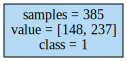

In [27]:
## 3. 의사결정나무 모델 시각화  - graphviz 패키지로 트리 모델 시각화
# 트리 모델 생성 gini,depth = 4로 모델 생성
tree4 = DecisionTreeClassifier(criterion = "gini",max_depth =4 ,min_samples_leaf =200, random_state = 1234)
# 트리모델 training
tree5 = tree4.fit(ds_health_train_x,ds_health_train_y)

# 트리 모델을 tree.dot 파일로 저장
export_graphviz(tree5,out_file = "tree3.dot",class_names=["0","1"],
               feature_names = ds_health_train_x.columns,impurity=False,filled = True)

#PATH 설정 :
# os.environ["PATH"] += os.pathsep + "./"

# Graphviz로 트리 모델 시각화s
with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
# tree.feature_importances 로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = ds_health_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance",ascending = False)
ds_feature_importance.round(3)

,Feature,Importance
0,mean radius,0.000
1,mean texture,0.029
2,mean perimeter,0.000
3,mean area,0.000
4,mean smoothness,0.000
5,mean compactness,0.000
6,mean concavity,0.000
7,mean concave points,0.047
8,mean symmetry,0.000
9,mean fractal dimension,0.000


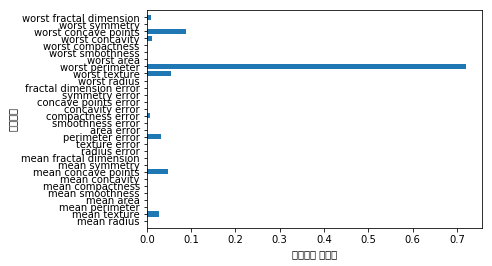

In [29]:
# 설명변수 중요도 그래프 함수 정의 
def plot_feature_importances(model):
    n_features = ds_health_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align ="center")
    plt.yticks(np.arange(n_features),ds_health_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
#설명변수 중요도 그래프 함수 실행
    
plot_feature_importances(tree)